# Hylogger TSG data in Xarray

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt 

from tsgxr import load_tsg

hyloggerdir = Path(r"C:\Users\WIL9DH\OneDrive - CSIRO\Projects\2022 - XT\2022 - MPL\07e4dcac-5216-44a6-9a6b-0c4c1f7ce7d")

In [3]:
ds = load_tsg(hyloggerdir, spectra='NIR', image=True, subsample_image=10, index_coord='depth')

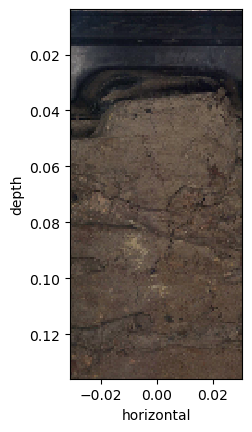

In [4]:
fig, ax = plt.subplots(1)
ds.Image[:200].plot.imshow(yincrease=False)
ax.set(aspect="equal");

[[], (-100.0, 100.0)]

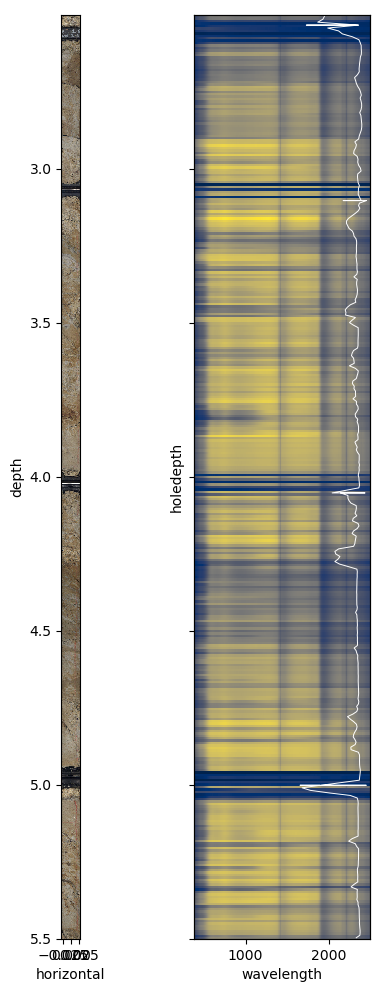

In [9]:
min_depth, max_depth = (2.5, 5.5)
interval = slice(min_depth, max_depth)

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(5, 12))
tx = ax[1].twiny()

# spectra
subspectra = ds.Spectra.sel(holedepth=interval)
subspectra.plot.imshow(ax=ax[1], yincrease=False, cmap='cividis',y='holedepth', add_colorbar=False)
# lidar
tx.plot(ds.Lidar.sel(holedepth=interval), subspectra.holedepth, color="w", lw=0.7)
# RGB imagery
ds.Image.sel(depth=interval).plot.imshow(ax=ax[0], yincrease=False)

ax[0].set(aspect='equal')
ax[1].set(xlim=(ds.wavelength.min(), ds.wavelength.max()))
tx.set(xticks=[], xlim=(-100, 100))

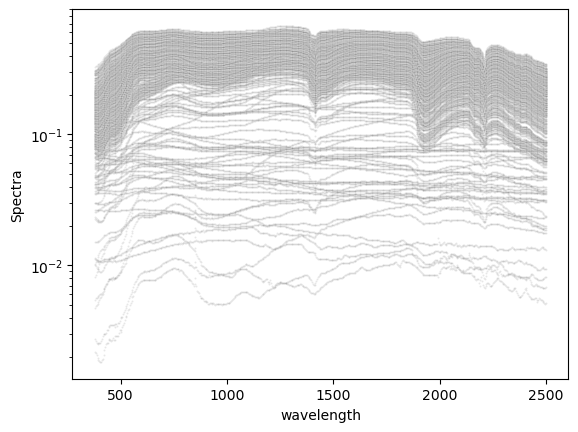

In [6]:
import matplotlib.pyplot as plt 
ds.Spectra[:500].plot.scatter(x='wavelength', add_legend=False, color='k', alpha=0.1, s=2)
plt.gca().set(yscale='log');